In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# use this command to read the csv file

fandango = pd.read_csv('fandango_scrape.csv')

In [4]:
# explore the dataframe properties 
# stars round up from rating

fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
# see number of rows and datatypes

fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
# see statistical relationships

fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot: xlabel='RATING', ylabel='VOTES'>

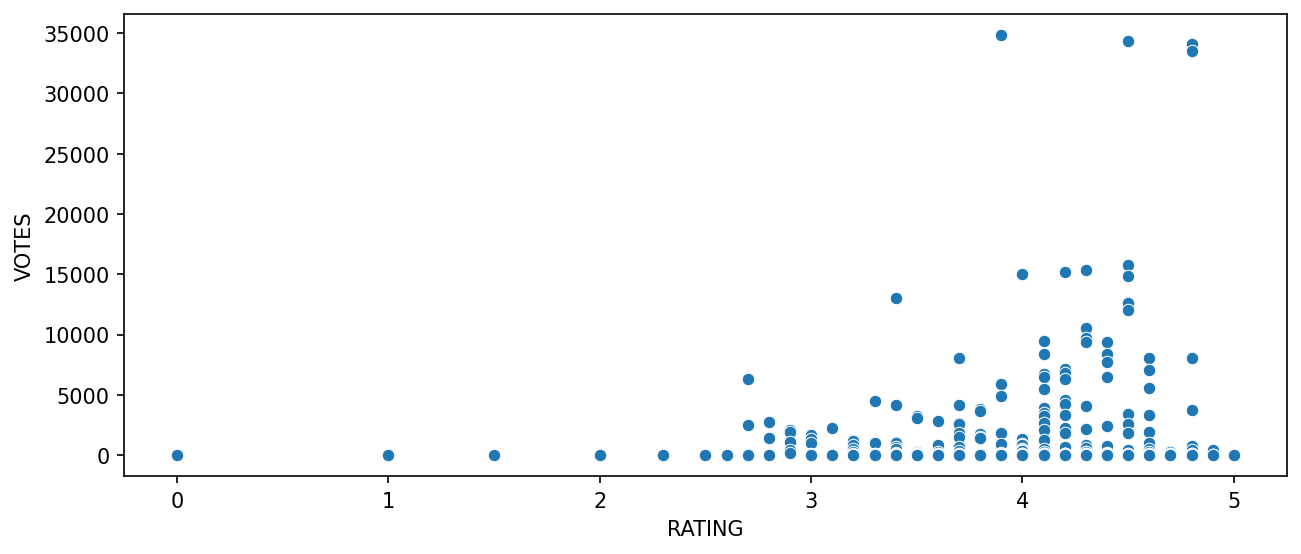

In [7]:
# Explore relationship between popularity of film and its rating
# Create a scatter plot to depict relationship between rating and votes
# Increase the size and dots per inch for better visibility

plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data = fandango, y='VOTES', x='RATING')

In [8]:
# Calculate the correlation between columns
# Notice that stars and rating is not perfectly correlated

fandango.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_82144\913088978.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [9]:
# Assuming that every row in FILM column has the same format:
# Film Title Name (YEAR)
# Create a new column that is able to strip the year from the title strings

fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [10]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [11]:
# Determine how many movies are in the Fandango DataFrame per year

fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot: xlabel='YEAR', ylabel='count'>

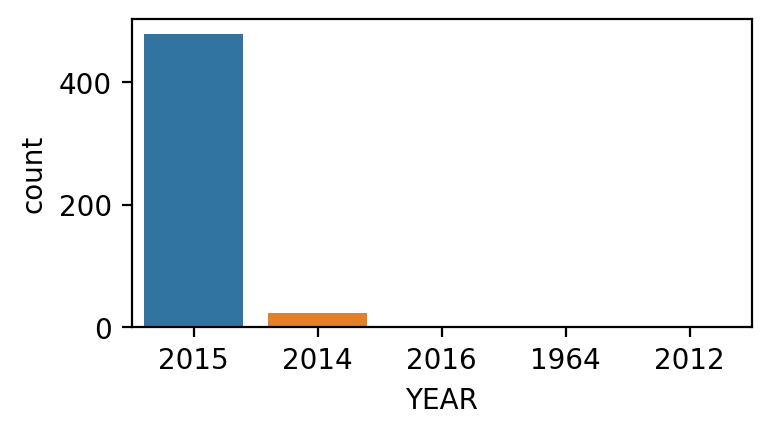

In [12]:
# Visualize the count of movies per year with a plot

plt.figure(figsize=(4,2), dpi=200)
sns.countplot(data=fandango,x='YEAR')


In [13]:
# Determine the 10 movies with the highest number of votes

fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [14]:
# Determine how many movies have zero votes

no_votes = fandango['VOTES'] == 0
no_votes.sum()

69

In [15]:
# Alternate method determine how many movies have zero votes

fandango[fandango['VOTES'] == 0]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [16]:
# Take the len() of the altnernate method

len(fandango[fandango['VOTES'] == 0])

69

In [17]:
# Create a dataframe of only reviewed films by removing any films that have zero votes

fan_reviewed = fandango[fandango['VOTES']>0]

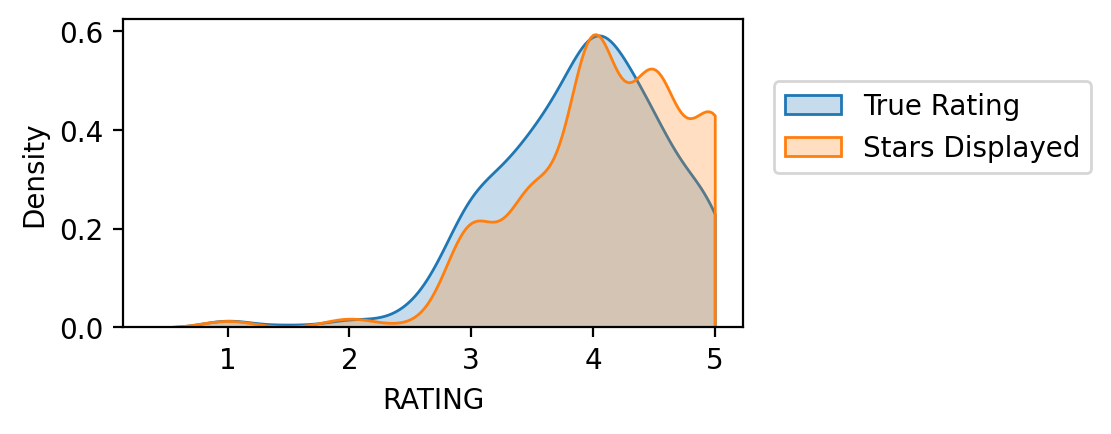

In [18]:
# In the article, it was noted that the true user rating may be slightly different than the rating shown to the user due to HTML and star rating displays
# Here, we visualize the difference between the true user rating and the star rating displayed

plt.figure(figsize=(4,2), dpi=200)

sns.kdeplot(data=fan_reviewed, x='RATING', clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fan_reviewed, x='STARS', clip=[0,5], fill=True, label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

In [19]:
# Create a column computing mathematical relationship between the true rating/stars displayed discrepency
# The warning is because we did not make a .copy of the original dataframe
# Instead of a full copy, we made a dataframe based on a slice of a previous dataframe
# Can use .copy to make an entire new dataframe, but that takes up more RAM

fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

C:\Users\User\AppData\Local\Temp\ipykernel_82144\286864612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']


In [20]:
fan_reviewed.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


In [21]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

C:\Users\User\AppData\Local\Temp\ipykernel_82144\1229596765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


In [22]:
fan_reviewed.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


<AxesSubplot: xlabel='STARS_DIFF', ylabel='count'>

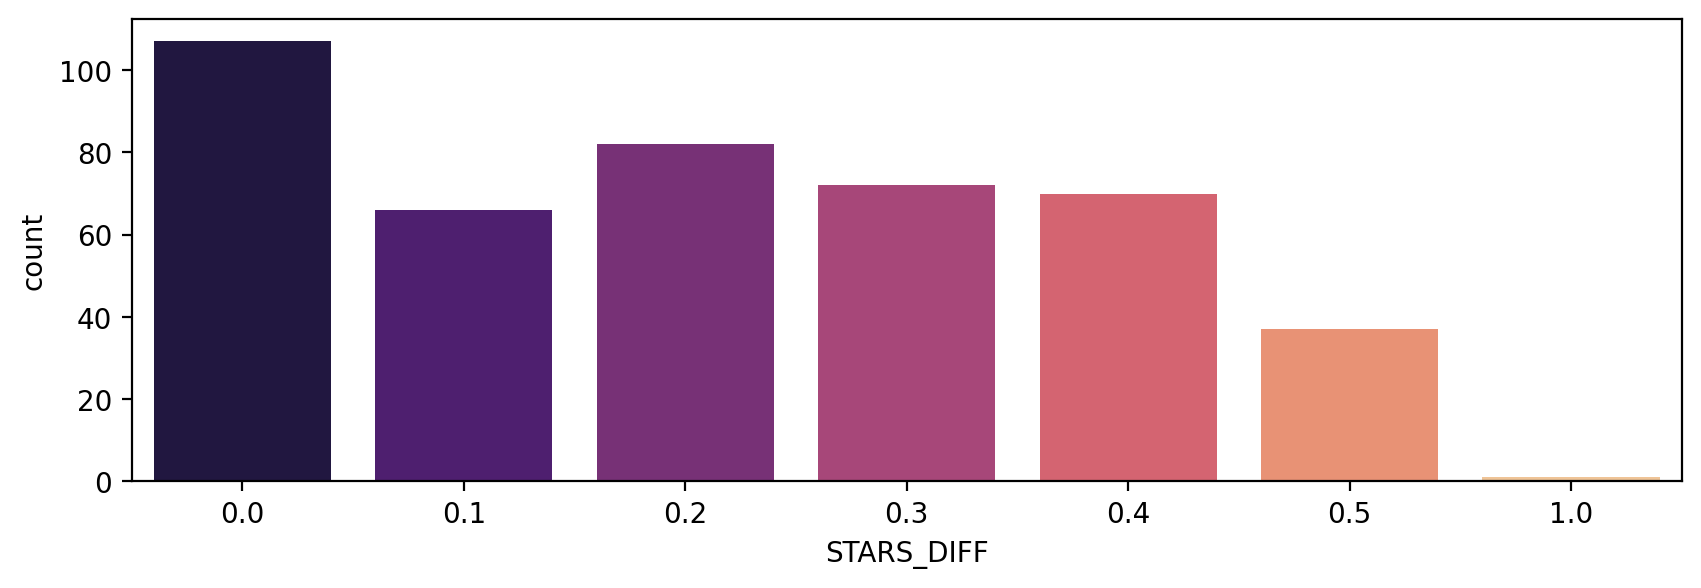

In [23]:
# Visualize the number of instances each rating is .1 off, .2, etc

plt.figure(figsize=(10,3), dpi = 200)
sns.countplot(data=fan_reviewed, x='STARS_DIFF', palette='magma')

In [24]:
# Are there any films where the internal user rating and displayed star differs by 1 whole point?

fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [25]:
# Here, we create a new dataframe that compares other websites scores

all_sites = pd.read_csv("all_sites_scores.csv")

In [26]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


(0.0, 100.0)

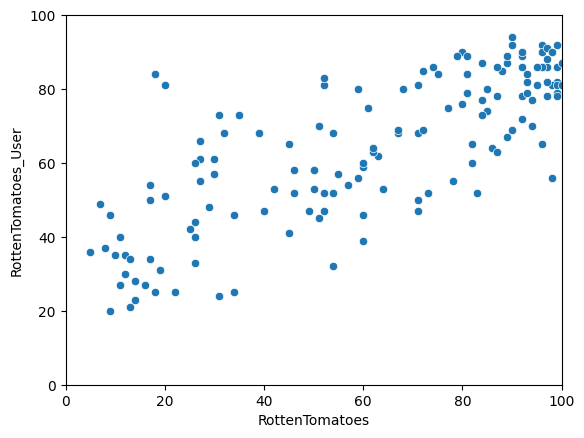

In [27]:
# Create a scatter plot that compares the relationship between critic reviews and user reviews on Rotten Tomatoes

sns.scatterplot(data=all_sites, x= 'RottenTomatoes', y='RottenTomatoes_User')

plt.ylim(0,100)
plt.xlim(0,100)

In [28]:
# Explore mathematical relationship between Rotten Tomatoes Critics vs User Ratings

all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [29]:
# Calculate mean difference between Rotten Tomatoes Critics vs User

all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

<AxesSubplot: xlabel='Rotten_Diff', ylabel='Count'>

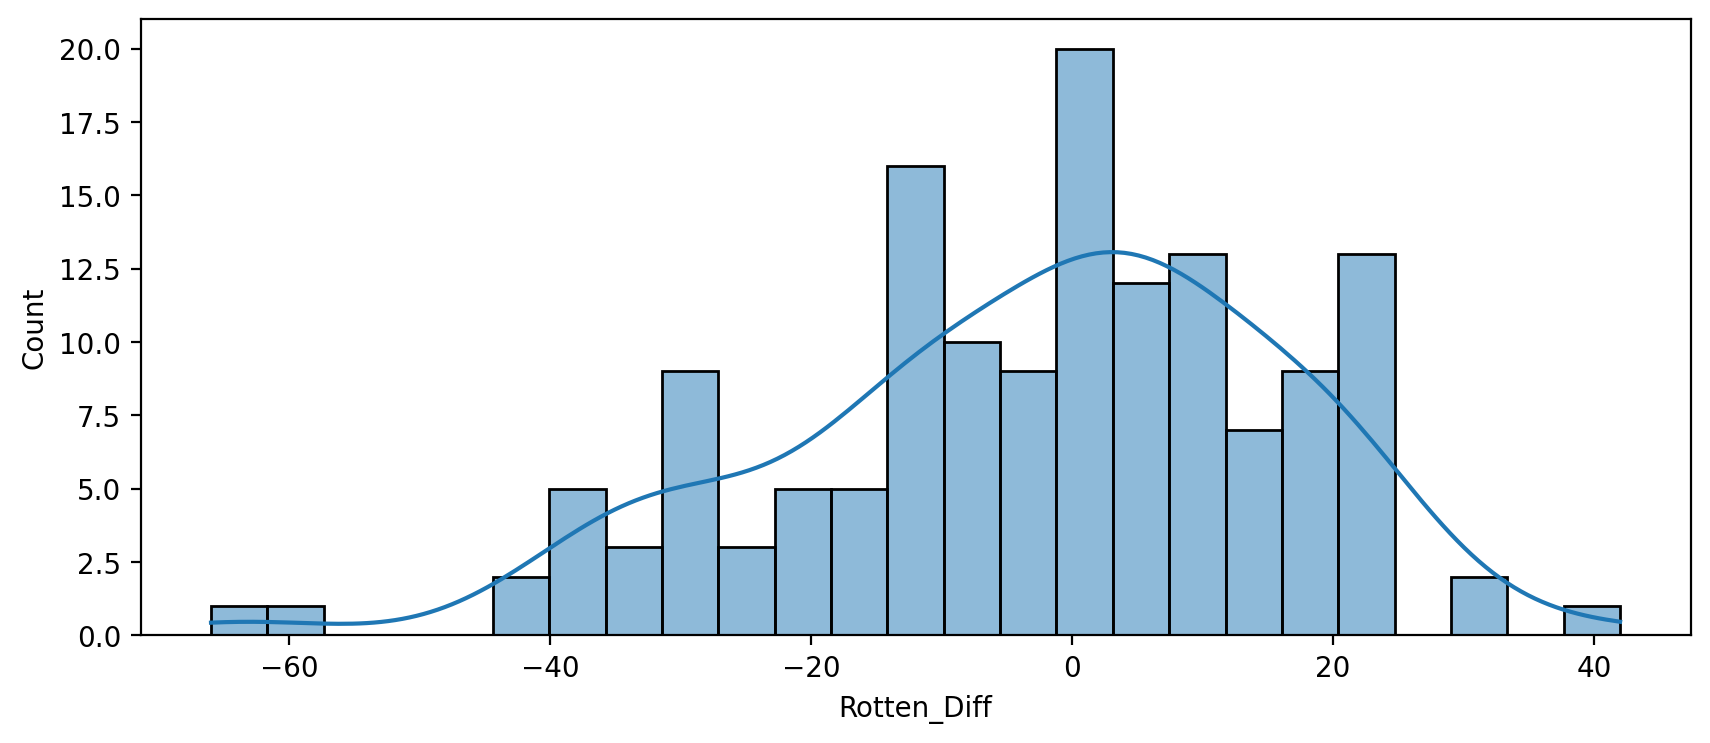

In [30]:
# Plot the distribution of the differences between RT Critics Score and RT User Score

plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)

<AxesSubplot: xlabel='Rotten_Diff', ylabel='Count'>

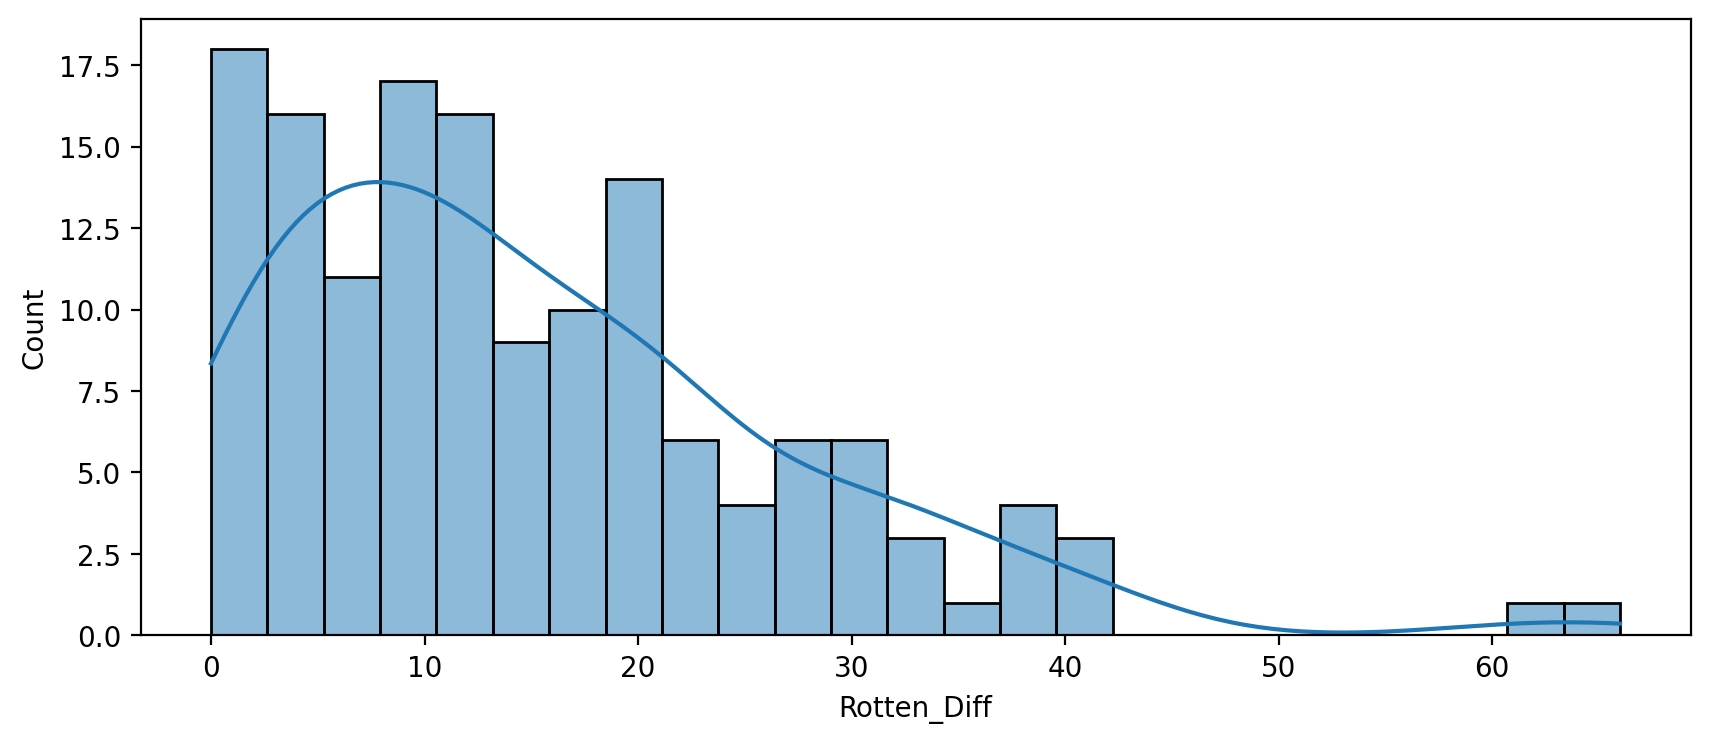

In [31]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), kde=True, bins=25)

In [32]:
# Determine which movies are causing the largest differences in ratings. 

#First find which USERS rated higher than CRITICS
all_sites.nsmallest(5, 'Rotten_Diff')[['FILM', 'RottenTomatoes', 'RottenTomatoes_User']]

,FILM,RottenTomatoes,RottenTomatoes_User
3,Do You Believe? (2015),18,84
85,Little Boy (2015),20,81
105,Hitman: Agent 47 (2015),7,49
134,The Longest Ride (2015),31,73
125,The Wedding Ringer (2015),27,66


In [33]:
#First find which CRITICS rated higher than USERS
all_sites.nlargest(5, 'Rotten_Diff')[['FILM', 'RottenTomatoes', 'RottenTomatoes_User']]

,FILM,RottenTomatoes,RottenTomatoes_User
69,Mr. Turner (2014),98,56
112,It Follows (2015),96,65
115,While We're Young (2015),83,52
37,Welcome to Me (2015),71,47
40,I'll See You In My Dreams (2015),94,70


(0.0, 100.0)

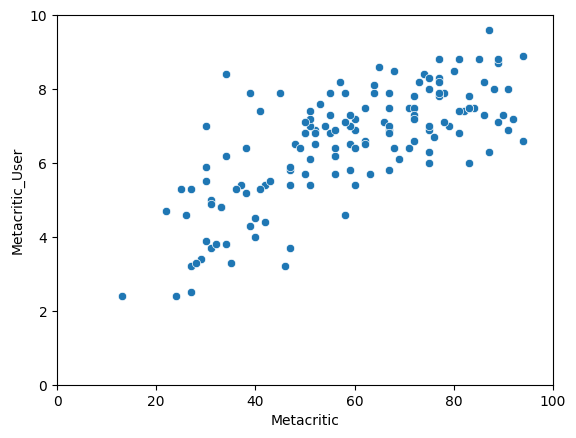

In [38]:
# Create a scatter plot that compares the relationship between Meta Critic score and Meta Critic rating

sns.scatterplot(data=all_sites, x= 'Metacritic', y='Metacritic_User')

plt.ylim(0,10)
plt.xlim(0,100)

# Seems mostly Linear - as user ratings increase, so do critic ratings. 
# No apparent huge outliers

In [39]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


<AxesSubplot: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

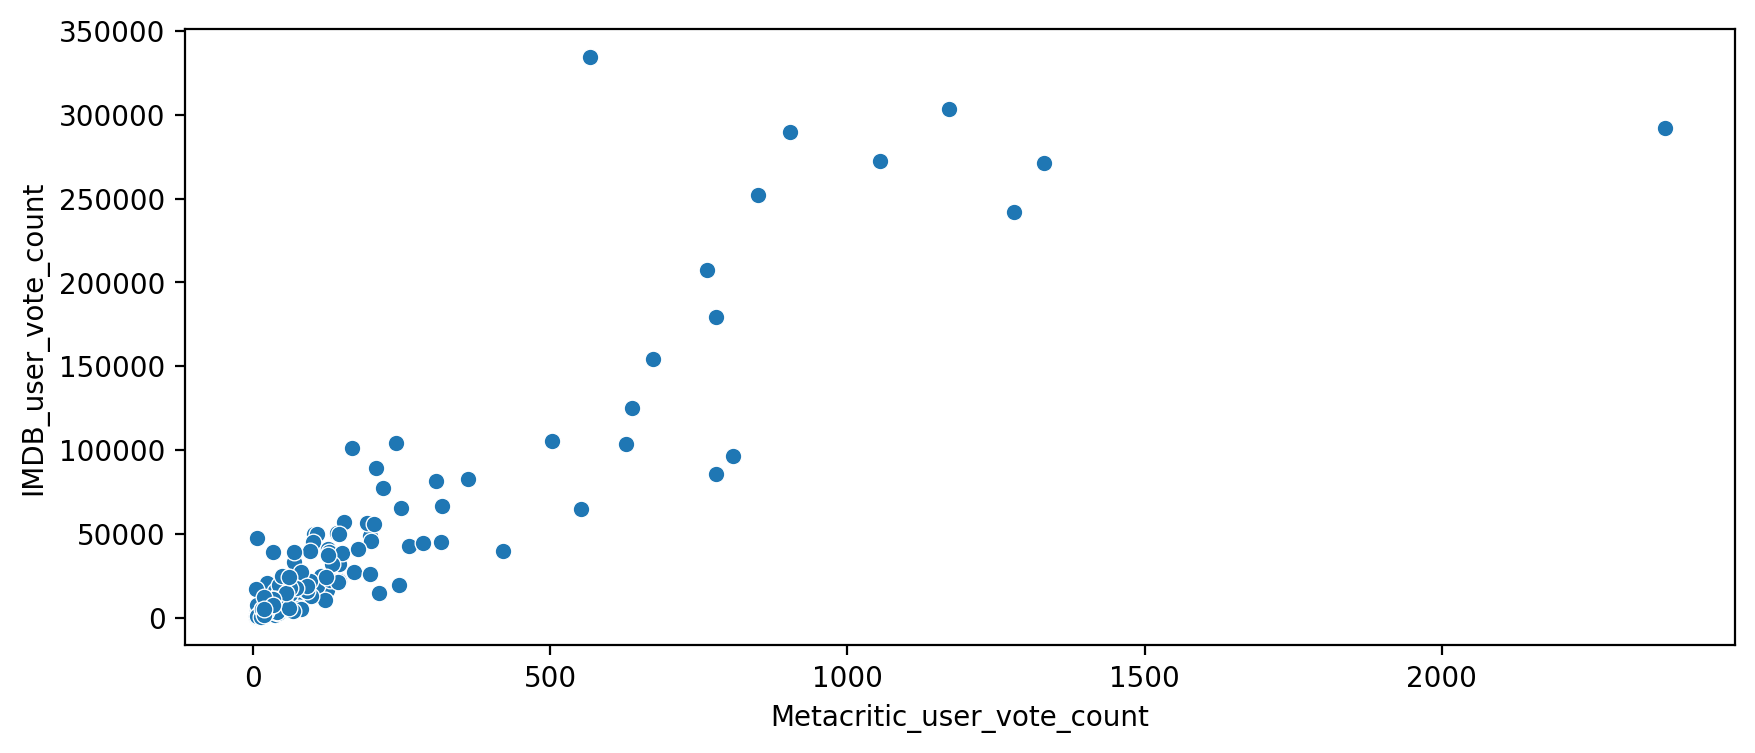

In [43]:
# Compare user vote count from Metacritic vs user vote count IMDB
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=all_sites, x= 'Metacritic_user_vote_count', y='IMDB_user_vote_count')

# Notice two outliers

In [44]:
# Discover which movies the two outliers are from scatterplot

all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [45]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [47]:
# Compare relationship between Fandango Scores vs All Sites

# Combine Fandangto Table with All Sites table 
# Use Inner Merge to ensure only comparing movies in both DataFrames

df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [48]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9
